In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit
from uncertainties import *
from uncertainties import unumpy as unp
import  seaborn as sns
from scipy.odr import *
%matplotlib inline
sns.set()

In [2]:
df=pd.read_excel('SEB.Daten.xlsx',sheet_name='Aufgabe1')
g=9.81
df.head()

,laenge,hoehe,f_vert,f_hori
0,120,24.8,9.4,1.9
1,120,24.8,9.5,1.6
2,120,24.8,9.6,2.0
3,120,36.8,9.1,2.5
4,120,36.8,9.2,2.5


# Aufgabe 5

In [3]:
m1=0.994 #masse von Rutscher mit einem gewicht
f_g=m1*g
f_para=df['f_hori']
f_perp=df['f_vert']
alpha=np.arcsin(df['hoehe']/df['laenge'])    #hoehe durch lange ist: opposite katet durch  hypothenuse

In [4]:
cos_alpha_exp=f_perp/f_g
cos_alpha_teo=np.cos(alpha)
sin_alpha_exp=f_para/f_g
sin_alpha_teo=np.sin(alpha)
tan_alpha_exp=f_para/f_perp
tan_alpha_teo=np.tan(alpha)

In [5]:
#These functions group up the data in sublits of 3 elements since every measurement was permoed three times
def error(source):
    measurements=len(set(df['hoehe']))
    error_list=[]
    for i in range(measurements):
        data=source[3*i:3*i+3]
        avg=np.mean(data)
        error_stdev=np.std(data)   #error from standart deviation in data
        error_human=avg*0.1        #human error during measuremet. Let's say 10%
        error=error_human+error_stdev
        error_list.append(error)
    return error_list
def average(source):
    measurements=len(set(df['hoehe']))
    average_list=[]
    for i in range(measurements):
        data=source[3*i:3*i+3]
        avg=np.mean(data)
        average_list.append(avg)
    return average_list
def format(xlabel, ylabel):
    plt.xlabel(xlabel, fontsize=15, labelpad=None)
    plt.ylabel(ylabel, fontsize=15, labelpad=None)
    plt.grid(b=True, which='major', axis='both')
    plt.xticks(fontsize=15 )
    plt.yticks(fontsize=15 )

In [6]:
e_cos=error(cos_alpha_exp)
e_sin=error(sin_alpha_exp)
e_tan=error(tan_alpha_exp)
#having to add other measurements errors also

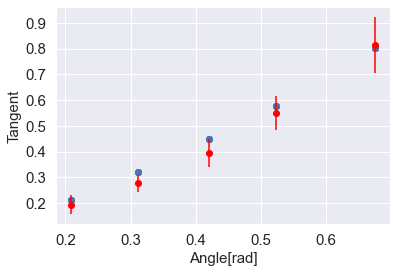

In [7]:
plt.errorbar(average(alpha),average(tan_alpha_exp),e_tan,fmt='o',c='red')
plt.scatter(alpha,tan_alpha_teo)
format('Angle[rad]','Tangent')
plt.savefig('Ex5TangentVsAngle',bbox_inches="tight")

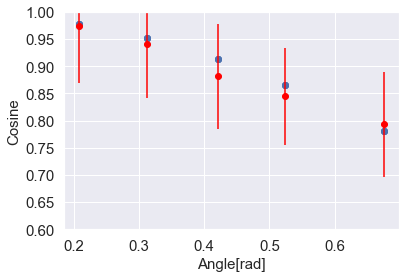

In [8]:
plt.errorbar(average(alpha),average(cos_alpha_exp),e_cos,fmt='o',c='red')
plt.scatter(alpha,cos_alpha_teo)
format('Angle[rad]','Cosine')
plt.ylim(0.6,1)
plt.savefig('Ex5CosineVsAngle',bbox_inches="tight")

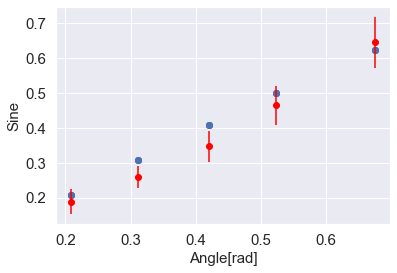

In [9]:
plt.errorbar(average(alpha),average(sin_alpha_exp),e_sin,fmt='o',c='red')
plt.scatter(alpha,sin_alpha_teo)
format('Angle[rad]','Sine')
plt.savefig('Ex5SineVsAngle',bbox_inches="tight")

# Aufgabe 6

In [10]:
df2=pd.read_excel('SEB.Daten.xlsx',sheet_name='Aufgabe2')
df2.head()

,f_hori_rutscher,f_hori_1masse,f_hori_2massen
0,0.68,1.30,2.10
1,0.78,1.40,2.05
2,0.50,1.38,2.30
3,0.56,1.50,2.15
4,0.60,1.50,2.10


In [11]:
f_avg=df2.mean()
f_error_human=f_avg*0.1 #10% fehler in messungen
f_error_stdev=df2.std()
f_err=f_error_human+f_error_stdev
print(f_avg,f_error_human,f_error_stdev)

f_hori_rutscher    0.598667
f_hori_1masse      1.401333
f_hori_2massen     2.116667
dtype: float64 f_hori_rutscher    0.059867
f_hori_1masse      0.140133
f_hori_2massen     0.211667
dtype: float64 f_hori_rutscher    0.078364
f_hori_1masse      0.055789
f_hori_2massen     0.077152
dtype: float64


In [12]:
massen=np.array([335,944,1557])/1000 #masse in kg

In [13]:
def func(x,mu):
    return mu*x
popt, pcov = curve_fit(func, massen, f_avg,maxfev=5000) 

In [14]:
popt

array([1.405954])

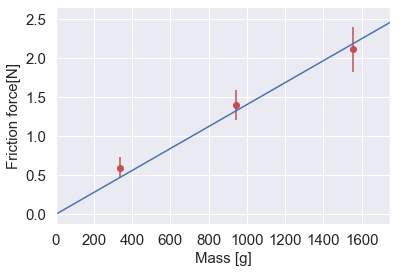

In [15]:
x=np.linspace(0,1800)/1000
plt.plot(x*1000,func(x,popt))
plt.xlim(0,1750)
plt.errorbar(massen*1000,f_avg,yerr=f_err,fmt='ro')
format('Mass [g]','Friction force[N]')
plt.savefig('StaticFrictionCoeficient',bbox_inches="tight")

In [16]:
err_m=np.sqrt(pcov[0][0])

In [17]:
mu=ufloat(popt[0],err_m)
print(mu)

1.41+/-0.06


# Aufgabe 7

In [18]:
df_zeit=pd.read_excel('SEB.Daten.xlsx',sheet_name='Aufgabe3zeiten')
df_pos=pd.read_excel('SEB.Daten.xlsx',sheet_name='Aufgabe3positionen')
df_zeit.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12
0,0.03,0.04,0.01,0.01,0.04,0.03,0.04,0.01,0.03,0.04,0.04,0.01
1,0.07,0.08,0.05,0.05,0.08,0.07,0.08,0.05,0.07,0.08,0.08,0.05
2,0.11,0.12,0.09,0.09,0.12,0.11,0.12,0.09,0.11,0.12,0.12,0.09
3,0.15,0.16,0.13,0.13,0.16,0.15,0.16,0.13,0.15,0.16,0.16,0.13
4,0.19,0.20,0.17,0.17,0.20,0.27,0.20,0.17,0.19,0.20,0.20,0.17


In [19]:
def accel(t,a):
    return 0.5*a*t**2

In [20]:
zeit_labels=list(df_zeit.columns)
pos_labels=list(df_pos.columns)

In [21]:
df_cpos=df_pos.copy(deep=True) #necessary to create copy, otherwise orginal dataframe will be modyfied. Problem for t data
df_czeit=df_zeit.copy(deep=True) 
max_pos_list=df_cpos.idxmax() #finding index of maximum for each dataset
min_pos_list=df_cpos.idxmin()# finding min index
#from here on inside loop
masse=0.994 #masse mit einem gewicht, selbe fuer alle messreihen
lenght=120 #in cm
df_height=pd.read_excel('SEB.Daten.xlsx',sheet_name='Aufgabe3extra')
df_height.drop(['Messreihe'],axis=1,inplace=True)
alpha=np.arcsin(df_height['Hoehe [cm]']/lenght) #angle of the plane
df_height.head()

,Gewicht [g],Hoehe [cm]
0,944,36.7
1,944,36.7
2,944,36.7
3,944,59.6
4,944,59.6


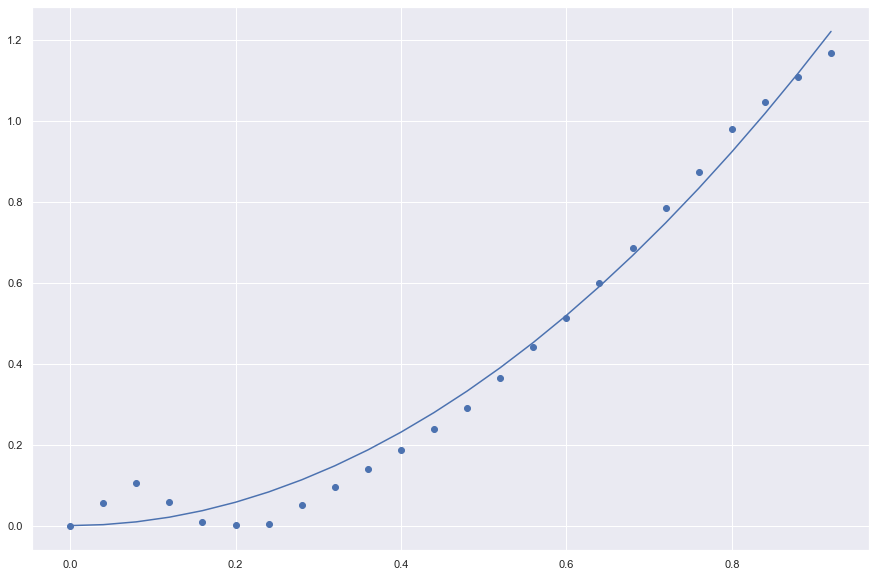

In [22]:
accel_list=[]
accel_err_list=[]
i=5
plt.rcParams["figure.figsize"] = (15,10)
max_pos=max_pos_list[i+1] #these refer to position
min_pos=min_pos_list[i+1]
pos_title=pos_labels[i]
zeit_title=zeit_labels[i]
t=df_czeit[zeit_title].dropna() #define x data and drop nan
s=df_cpos[pos_title].dropna() #define y data, dropna makes sure i have no nans in my data, which are there since the datasets 
    #are not all the same length
min_y_value,max_y_value=df_cpos[pos_title][min_pos],df_cpos[pos_title][max_pos] #finding values of min and max pf position
min_x_value,max_x_value=df_czeit[zeit_title][min_pos],df_czeit[zeit_title][max_pos] #same for time
pos_new,time_new=s[min_pos:max_pos],t[min_pos:max_pos]

#now we still need to cut a few more values that are at the end
interval=(max_y_value-min_y_value)/4 #values should be at least this far from the maximum
pos_new=pos_new.reset_index(drop=True)
time_new=time_new.reset_index(drop=True)
for l in range(len(pos_new)):
    if (abs(pos_new[l]-max_y_value))<interval:
        pos_new.drop([l],inplace=True)
        time_new.drop([l],inplace=True)
pos_new-=min_y_value
time_new-=min_x_value
if len(time_new) != len(pos_new): #pretty shiy but if length is different will tell in whcih dataset the problem is
        print(i)                    
def accel(t,a):
    return 0.5*a*t**2
popt, pcov = curve_fit(accel, time_new, pos_new,maxfev=5000) #this is just fitting, we are interested in the first to things that popt returns
accel_list.append(popt[0])
accel_err_list.append(pcov[0])
plt.plot(time_new,accel(time_new,popt[0]))
plt.scatter(time_new,pos_new)

3,5
For 3 the interval denominator needs to be 4
For 5

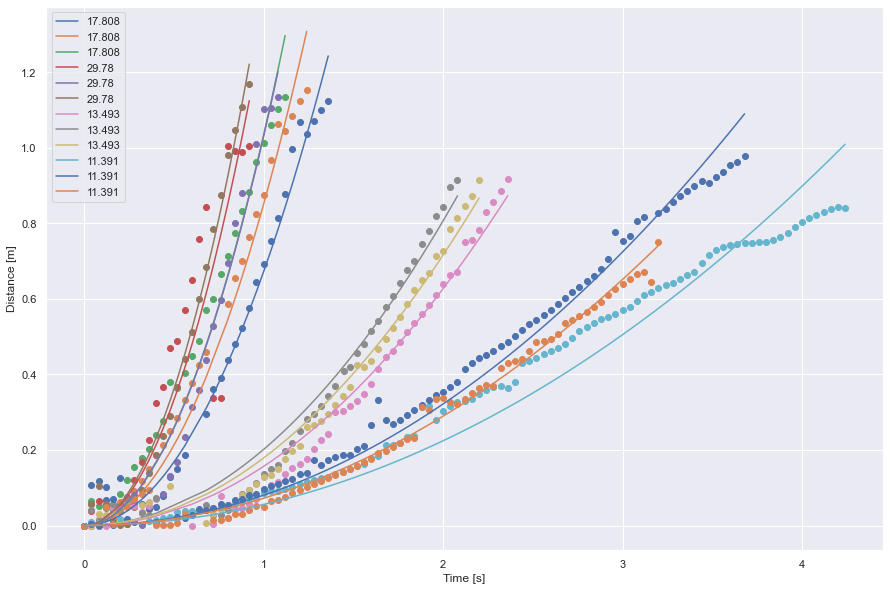

In [23]:
accel_list=[]
accel_err_list=[]
for i in range(len(zeit_labels)):
    max_pos=max_pos_list[i+1] #these refer to position
    min_pos=min_pos_list[i+1]
    pos_title=pos_labels[i]
    zeit_title=zeit_labels[i]
    t=df_czeit[zeit_title].dropna() #define x data and drop nan
    s=df_cpos[pos_title].dropna() #define y data, dropna makes sure i have no nans in my data, which are there since the datasets 
        #are not all the same length
    min_y_value,max_y_value=df_cpos[pos_title][min_pos],df_cpos[pos_title][max_pos] #finding values of min and max pf position
    min_x_value,max_x_value=df_czeit[zeit_title][min_pos],df_czeit[zeit_title][max_pos] #same for time
    pos_new,time_new=s[min_pos:max_pos],t[min_pos:max_pos]

    #now we still need to cut a few more values that are at the end
    exceptions=[3,5]
    if i not in exceptions:
        denomin=9.5
    else:
        denomin=4    
    interval=(max_y_value-min_y_value)/denomin #values should be at least this far from the maximum
    pos_new=pos_new.reset_index(drop=True)
    time_new=time_new.reset_index(drop=True)
    for l in range(len(pos_new)):
        if (abs(pos_new[l]-max_y_value))<interval:
            pos_new.drop([l],inplace=True)
            time_new.drop([l],inplace=True)
    pos_new-=min_y_value
    time_new-=min_x_value
    if len(time_new) != len(pos_new): #pretty shit but if length is different will tell in whcih dataset the problem is
            print(i)                    
    def accel(t,a):
        return 0.5*a*t**2
    popt, pcov = curve_fit(accel, time_new, pos_new,maxfev=5000) #this is just fitting, we are interested in the first to things that popt returns
    accel_list.append(popt[0])
    accel_err_list.append(pcov[0])
    plt.plot(time_new,accel(time_new,popt[0]),label=round(alpha[i]/np.pi * 180.,3))
    plt.scatter(time_new,pos_new)
    plt.xlabel('Time [s]')
    plt.ylabel('Distance [m]')
    plt.legend()
    plt.savefig('Aufgabe7',bbox_inches="tight")

In [24]:
masse=0.994 #masse mit einem gewicht, selbe fuer alle messreihen
lenght=120 #in cm
df_height=pd.read_excel('SEB.Daten.xlsx',sheet_name='Aufgabe3extra')
df_height.drop(['Messreihe'],axis=1,inplace=True)
height_uarray=np.array([ufloat(val,1) for val in df_height['Hoehe [cm]']])
lenght_ufloat=ufloat(lenght,1)
alpha_rad=unp.arcsin(height_uarray/lenght_ufloat)
x_rad=np.array(unp.nominal_values(alpha_rad))
x_err_rad=np.array(unp.std_devs(alpha_rad))
alpha=np.array([ufloat(np.rad2deg(val),np.rad2deg(err)) for val,err in zip(x_rad,x_err_rad)])
df_height.head()

,Gewicht [g],Hoehe [cm]
0,944,36.7
1,944,36.7
2,944,36.7
3,944,59.6
4,944,59.6


$\frac{a}{g}=\sin\alpha-\mu\cos\alpha$

In [25]:
accel_list

[1.3435782772084295,
 1.700601261920404,
 2.0672403398578583,
 2.6562647798278016,
 2.059355482560582,
 2.8849589937101676,
 0.31334772816818246,
 0.40317110960552194,
 0.35792700242326125,
 0.11223209475556173,
 0.16088224220165903,
 0.14471332194579714]

In [26]:
def func_ex7(beta,mu):
    return np.sin(beta)-mu*np.cos(beta)

In [27]:
a_uarray=np.array([ufloat(val,err) for val,err in zip(accel_list,accel_err_list)]) #creating uarray of accellerations
y_7=np.array([x/g for x in a_uarray]) #a/g, which will be y value in plot below

In [28]:
x=np.array(unp.nominal_values(alpha)) #is in degrees
x_err=np.array(unp.std_devs(alpha)) 
y=np.array(unp.nominal_values(y_7))
y_err=np.array(unp.std_devs(y_7))

In [29]:
popt_7, pcov_7 = curve_fit(func_ex7, y,x*np.pi / 180.,p0=[0.7],maxfev=5000) 
#fit with y error
muu=popt_7

In [30]:
# Create a model for fitting.
fit_model = Model(func_ex7)

# Create a RealData object using our initiated data from above.
data = RealData(x*np.pi / 180., y, sx=x_err*np.pi / 180., sy=y_err) #sine needs values in radians

# Set up ODR with the model and data.
odr = ODR(data, fit_model, beta0=[0.1])

# Run the regression.
out = odr.run()

# Use the in-built pprint method to give us results.
out.pprint()

Beta: [0.3819946]
Beta Std Error: [0.05777824]
Beta Covariance: [[5.72806283e-06]]
Residual Variance: 582.8017886690036
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


In [44]:
mu=out.beta

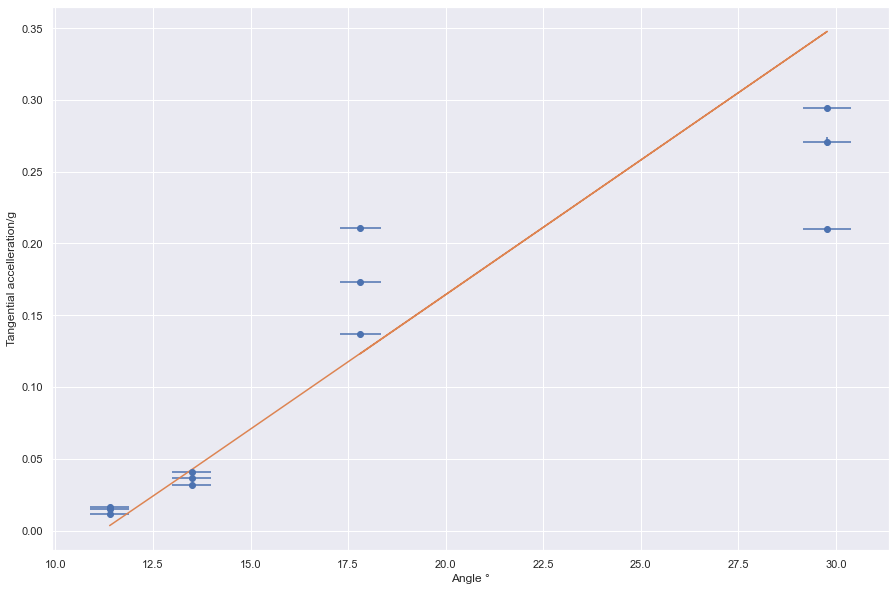

In [48]:
plt.errorbar(x,y,yerr=y_err,xerr=x_err,fmt='o')
plt.plot(x,func_ex7(x*np.pi / 180.,mu+0.02)+0.2)
plt.ylabel('Tangential accelleration/g')
plt.xlabel('Angle °')
plt.savefig('Aufgabe77',bbox_inches="tight")

In [34]:
mu

array([0.3819946])